In [6]:
!pip install -U tensorflow-addons

In [54]:
# Import the required libraries

import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [13]:
!tar -xf /content/drive/MyDrive/OCT2017.tar.gz 

In [14]:
# Store the base directory path
base_dir = os.path.join("/content/OCT2017/")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['test', 'train']


In [15]:
# Store the train, validation and test directory paths

train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))


test_dir = os.path.join(base_dir + "test/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['DME', 'CNV', 'DRUSEN', 'NORMAL']
Test Directory -->  ['DME', 'CNV', 'DRUSEN', 'NORMAL']


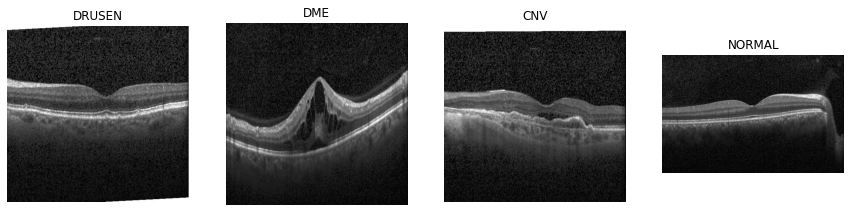

In [16]:
# Plot each type of image in the dataset

fig, ax = plt.subplots(1, 4, figsize=(15, 10))

drusen = random.choice(os.listdir(train_dir + "DRUSEN"))
drusen_image = load_img(train_dir + "DRUSEN/" + drusen)
ax[0].imshow(drusen_image)
ax[0].set_title("DRUSEN")
ax[0].axis("Off")

dme = random.choice(os.listdir(train_dir + "DME"))
dme_image = load_img(train_dir + "DME/" + dme)
ax[1].imshow(dme_image)
ax[1].set_title("DME")
ax[1].axis("Off")

cnv = random.choice(os.listdir(train_dir + "CNV"))
cnv_image = load_img(train_dir + "CNV/" + cnv)
ax[2].imshow(cnv_image)
ax[2].set_title("CNV")
ax[2].axis("Off")

normal = random.choice(os.listdir(train_dir + "NORMAL"))
normal_image = load_img(train_dir + "NORMAL/" + normal)
ax[3].imshow(normal_image)
ax[3].set_title("NORMAL")
ax[3].axis("Off")

plt.show()

In [17]:
import os
labels = os.listdir('/content/OCT2017/train')
print(labels)

['DME', 'CNV', 'DRUSEN', 'NORMAL']


In [22]:
# Model parameters
image_size = 224
batch_size = 32
num_classes = 4
epochs = 10

In [66]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale = 1./255) # set validation split

train_generator = train_datagen.flow_from_directory('/content/OCT2017/train', target_size = (image_size, image_size), class_mode = 'categorical', 
                                                    batch_size = 32,subset='training')


validation_generator = train_datagen.flow_from_directory('/content/OCT2017/train', target_size = (image_size, image_size), class_mode = 'categorical',
                                                         batch_size = 32,subset='validation')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory("/content/OCT2017/test", target_size = (image_size, image_size), class_mode = 'categorical', batch_size = 44)

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [24]:
INPUT_SHAPE = (image_size, image_size, 3)

In [25]:
mobile_net_v2 = tf.keras.applications.MobileNetV2(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = INPUT_SHAPE, 
    pooling = None, 
    classes = 1000
)

In [26]:
mobile_net_v2.trainable = False

In [27]:
model = tf.keras.models.Sequential([
    
    mobile_net_v2,
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          737344    
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               160100    
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 3,155,832
Trainable params: 897,848
Non-trainable params: 2,257,984
________________________________________

In [29]:
metrics_list = ['accuracy',
                tf.keras.metrics.AUC(),
                #tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4)]

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics_list)

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = (66788 /400),
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = (32/16),
    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
166/166 [==============================] - 44s 186ms/step - loss: 0.8679 - accuracy: 0.7433 - auc: 0.9131 - f1_score: 0.5978 - val_loss: 0.4513 - val_accuracy: 0.8125 - val_auc: 0.9663 - val_f1_score: 0.6923
Epoch 2/10
166/166 [==============================] - 29s 171ms/step - loss: 0.4991 - accuracy: 0.8170 - auc: 0.9568 - f1_score: 0.7106 - val_loss: 0.4777 - val_accuracy: 0.8125 - val_auc: 0.9628 - val_f1_score: 0.7454
Epoch 3/10
166/166 [==============================] - 28s 165ms/step - loss: 0.4465 - accuracy: 0.8366 - auc: 0.9647 - f1_score: 0.7485 - val_loss: 0.3164 - val_accuracy: 0.9219 - val_auc: 0.9823 - val_f1_score: 0.9013
Epoch 4/10
166/166 [==============================] - 26s 158ms/step - loss: 0.4056 - accuracy: 0.8546 - auc: 0.9705 - f1_score: 0.7813 - val_loss: 0.2419 - val_accuracy: 0.9062 - val_auc: 0.9904 - val_f1_score: 0.7739
Epoch 5/10
166/166 [==============================] - 26s 155ms/step - loss: 0.3906 - accuracy: 0.8589 - auc: 0.9722 - f1_sc

In [ ]:
#save model

model.save("/content/drive/MyDrive/MobileNetV2.hdf5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## **MODELE 2** : changement de validation step

In [32]:
metrics_list2 = ['accuracy',
                tf.keras.metrics.AUC(),
                #tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4)]

In [33]:
model2 = tf.keras.models.Sequential([
    
    mobile_net_v2,
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [34]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics_list2)

In [35]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = (66788 /400),
    epochs = 10,
    validation_data = validation_generator,
    
    validation_steps = validation_generator.samples//100,
    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
166/166 [==============================] - 52s 296ms/step - loss: 0.8081 - accuracy: 0.7551 - auc_1: 0.9151 - f1_score: 0.6301 - val_loss: 0.5109 - val_accuracy: 0.8166 - val_auc_1: 0.9574 - val_f1_score: 0.7370
Epoch 2/10
166/166 [==============================] - 47s 279ms/step - loss: 0.4750 - accuracy: 0.8296 - auc_1: 0.9606 - f1_score: 0.7318 - val_loss: 0.5751 - val_accuracy: 0.7897 - val_auc_1: 0.9461 - val_f1_score: 0.6835
Epoch 3/10
166/166 [==============================] - 45s 272ms/step - loss: 0.4821 - accuracy: 0.8277 - auc_1: 0.9595 - f1_score: 0.7438 - val_loss: 0.4460 - val_accuracy: 0.8404 - val_auc_1: 0.9654 - val_f1_score: 0.7476
Epoch 4/10
166/166 [==============================] - 45s 268ms/step - loss: 0.4234 - accuracy: 0.8481 - auc_1: 0.9679 - f1_score: 0.7570 - val_loss: 0.3934 - val_accuracy: 0.8579 - val_auc_1: 0.9726 - val_f1_score: 0.7677
Epoch 5/10
166/166 [==============================] - 44s 265ms/step - loss: 0.4106 - accuracy: 0.8552 - auc

In [36]:
#save model 2

model2.save("/content/drive/MyDrive/MobileNetV2.hdf5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


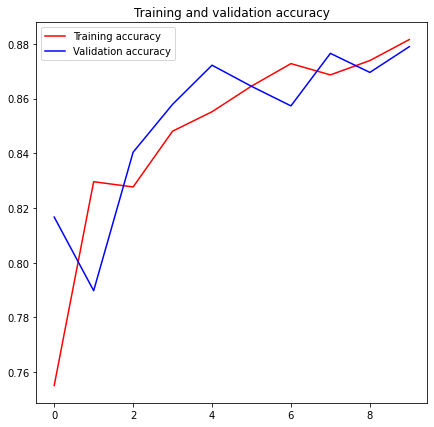

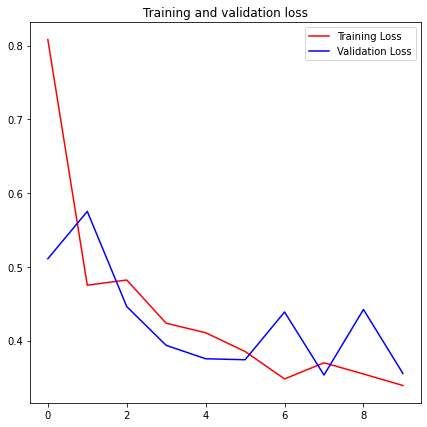

In [42]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (7,7))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
score = model2.evaluate_generator(test_generator,steps = test_generator.samples // 100, verbose= 1) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


10/10 [==============================] - 2s 152ms/step - loss: 0.3210 - accuracy: 0.8659 - auc_1: 0.9829 - f1_score: 0.8613



Test Loss: 0.32103288173675537
Test accuracy: 0.8659090995788574


In [56]:
pred_datagen = ImageDataGenerator(rescale = 1./255)

pred_generator = pred_datagen.flow_from_directory("/content/OCT2017/test",target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)  

Found 1000 images belonging to 4 classes.


In [57]:
pred_generator.reset()
y_pred = model2.predict_generator(pred_generator,steps = 1000)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

--------------------
| Confusion Matrix |
--------------------

 [[248   1   1   0]
 [ 20 217   0  13]
 [ 93   0 150   7]
 [  0   1   1 248]]


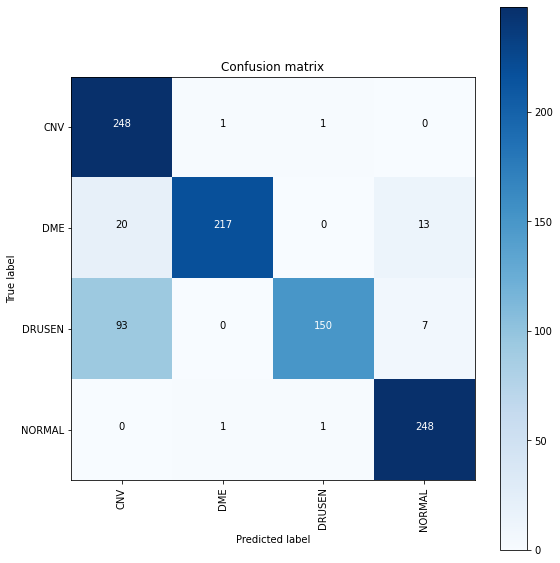

In [59]:
# confusion matrix
import itertools
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred,target_names=['CNV','DME','DRUSEN','Normal']))

              precision    recall  f1-score   support

         CNV       0.69      0.99      0.81       250
         DME       0.99      0.87      0.93       250
      DRUSEN       0.99      0.60      0.75       250
      Normal       0.93      0.99      0.96       250

    accuracy                           0.86      1000
   macro avg       0.90      0.86      0.86      1000
weighted avg       0.90      0.86      0.86      1000

